In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import pylab as pl
%pylab inline
import seaborn as sns

import statsmodels.formula.api as smf
from sklearn.metrics import roc_auc_score

from mpl_toolkits.mplot3d import Axes3D  # for 3D plot

from sklearn.mixture import GaussianMixture
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve


import statsmodels.api as sm
import statsmodels.formula.api as smf
from numpy import linalg
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

colors = ['y', 'm', 'c', 'r', 'g', 'b', 'k', 'DeepPink',\
          'DodgerBlue', 'Aquamarine', 'MediumSpringGreen',\
         'MidnightBlue', 'Gold', 'DarkSlateGray', 'LimeGreen', \
         'LightSeaGreen', 'Salmon', 'Indigo', 'DarkMagenta', \
         'Thistle', 'DeepSkyBlue', 'CadetBlue', \
         'BlueViolet', 'Chocolate', 'SaddleBrown', 'Maroon', \
         'Peru', 'DarkOrange', 'Teal', 'DarkKhaki']


Populating the interactive namespace from numpy and matplotlib


/Users/baileygriswold/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
/Users/baileygriswold/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def hypertuner(X_train, y_train, X_val, y_val):
    param_grid ={'max_depth':np.arange(1,20,2),
                'max_leaf_nodes':np.arange(2,20,2),
                'min_samples_leaf':np.arange(2,20,2)} #maybe take n_estimators out


    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = i)
    dt=RandomForestClassifier()#don't specifcy alpha in the intialization
    gr=GridSearchCV(dt,param_grid=param_grid)#pass in predictor, and gridded parameters
    rs=gr.fit(X_train,y_train)#run predictor with each parameter using training data
    print (rs.best_params_) #will output the best parameter, the best alpha
    pred=rs.predict_proba(X_val)[:,1]
    print ('ROC AUC: ', roc_auc_score(np.array(y_val),pred))


In [3]:
def tree_fits(X, y):
    #split training and test data (Set before the missing dates, and after the missing dates)
    X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)
    
    fig = plt.figure(figsize=(10,4))
    # learn model
    dt=DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    y_score = dt.predict_proba(X_test)
    average_precision = average_precision_score(y_test, y_score[:,0])
    
    print ('Decision Tree Classifier Results: ')
    # in sample accuracy
    print ('In sample accuracy:',dt.score(X_train,y_train))

    # out of sample accuracy
    print ('Out of sample accuracy:',dt.score(X_test,y_test))

    print ('\n')
    print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
   
    fig.add_subplot(1, 3, 1)
    precision, recall, _ = precision_recall_curve(y_test, y_score[:,0])
    plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
    
    print ('\n')
    
    # learn model
    dt=RandomForestClassifier()
    dt.fit(X_train,y_train)
    y_score = dt.predict_proba(X_test)
    average_precision = average_precision_score(y_test, y_score[:,0])

    # in sample accuracy
    print ('Random Forest Classifier Results: ')
    print ('In sample accuracy:',dt.score(X_train,y_train))

    # out of sample accuracy
    print ('Out of sample accuracy:',dt.score(X_test,y_test))
    
    print ('\n')
    print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
    fig.add_subplot(1, 3, 2)
    precision, recall, _ = precision_recall_curve(y_test, y_score[:,0])
    plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

    print ('\n')
    
    # learn model
    dt=ExtraTreeClassifier()
    dt.fit(X_train,y_train)
    y_score = dt.predict_proba(X_test)
    average_precision = average_precision_score(y_test, y_score[:,0])

    print ('Extra Tree Classifier Results: ')
    # in sample accuracy
    print ('In sample accuracy:',dt.score(X_train,y_train))

    # out of sample accuracy
    print ('Out of sample accuracy:',dt.score(X_test,y_test))
    print ('\n')
    print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
    fig.add_subplot(1, 3, 3)
    precision, recall, _ = precision_recall_curve(y_test, y_score[:,0])
    plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
    
    plt.tight_layout()

In [4]:
def class_upp_samp(X,y):
    df_train = X.copy()
    df_train['output'] = y.copy()
    count_class = {}
    for x in df_train['output'].value_counts().index:
        count_class[x] = df_train['output'].value_counts()[x]

    class_dfs = {}
    # Divide by class
    for x in count_class.keys():
        class_dfs[x] = df_train[df_train['output'] == x]

    biggest_cls = int(max(count_class, key=count_class.get))
    count_class[biggest_cls]
    classes = list(count_class.keys())
    classes.pop(biggest_cls)

    for x in classes:
        class_dfs[x] = class_dfs[x].sample(count_class[biggest_cls], replace=True) #take the number of fatal accidents as slight

    df_train_over = pd.concat(class_dfs, axis=0)
    
    Xnu = df_train_over.iloc[:,:-1]
    ynu = df_train_over['output']
    
    return(Xnu,ynu)


In [5]:
def mos_imp_feat(fet_imp, lim):
    labels = fet_imp.sort_values(by=['Importance'], 
                                 ascending=False).loc[:lim, :].Variable
    fet_imp.sort_values(by=['Importance'], ascending=False).head(len(labels))\
                        .plot(kind='barh', figsize=(10,6))

    pl.yticks(np.arange(len(labels)), labels)

In [6]:
def feat_imp(X_train, model):
    fet_imp = pd.DataFrame(list(zip(list(X_train.columns), 
                                    model.feature_importances_)), 
                           columns=['Variable', 'Importance'])
    fet_imp.sort_values(by=['Importance'], 
                        ascending=False).head(50).plot(kind='bar', figsize=(10,6))
    return (fet_imp)



# Read in Data

In [7]:
# Define different data sets
schmelts = ['schmelt05-16.csv', 'schmelt09-16.csv', 'schmelt11-15.csv', 
            'schmelt13-16.csv', 'schmelt96-16.csv']

# Choose which one to input 
#df = pd.read_csv('data/{}'.format(schmelts[4]))
df = pd.read_csv('./schma_data/{}'.format(schmelts[4]))

# Visualise Schools Types
df.LCGSCHCAT.value_counts(dropna=False)

ELEMENTARY              792
HIGH SCHOOL             549
JUNIOR HIGH-INTERMED    353
NaN                     112
K-12 ALL GRADES          41
SECONDARY SCHOOL         38
EARLY CHILDHOOD          37
K-8                      24
COLLABORATIVE OR MUL     24
DISTRICT PRE-K CENTE     13
UNGRADED                 12
CENTRAL-HQ-CITYWIDE       1
Name: LCGSCHCAT, dtype: int64

# Create School Type Data sets
### High

In [8]:
# CReate School DF
Highdf = df[df.LCGSCHCAT == 'HIGH SCHOOL']

# Drop columns and rows with all Nulls
Highdf.dropna(axis=1, how='all', inplace=True)
Highdf.dropna(axis=0, how='all', inplace=True)

# Drop columns from unnecessary data
# Grades
Grades = ['G01','G02','G03','G04','G05','G06','G07','G08','PRK','KID']
for grd in Grades:
    Highdf = Highdf[Highdf.columns[~Highdf.columns.str.contains(grd)]]

# Other things
Colsdrop = ['CBO']
for cols in Colsdrop:
    Highdf = Highdf[Highdf.columns[~Highdf.columns.str.contains(cols)]]
    
# Drop all values with more than 100 nulls
for col in Highdf.columns:
    if Highdf[col].isnull().sum() >= 100:
        Highdf.drop([col], axis=1, inplace=True)
        
print('Original Size: ' + str(Highdf.shape[0]))
        
# Drop all Null values - does not reduce data set too much
Highdf.dropna(inplace=True)

# Drop rows with ranges below 2 in any remaining field and drop all range fields
for i in Highdf.columns[Highdf.columns.str.contains('range')]:
    Highdf = Highdf[~(Highdf[i] < 3)]
    Highdf.drop([i], axis=1, inplace=True)

print('Post Cleaning Size: ' + str(Highdf.shape[0]))
print('Number of Renewal Schools ' + str(Highdf.RenewlSchl.sum()))
print('Number of Community Schools ' + str(Highdf.Community_Sch.sum()))
print('Number of Closed Schools ' + str(Highdf.Closed.sum()))

# Preview
Highdf.head()

/Users/baileygriswold/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/baileygriswold/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Original Size: 549
Post Cleaning Size: 378
Number of Renewal Schools 11.0
Number of Community Schools 63.0
Number of Closed Schools 51.0


,BNLONG,ATTPCTG09 trend96_16,ATTPCTG10 trend96_16,ATTPCTG11 trend96_16,ATTPCTTOT trend96_16,CLSAVGG09 trend96_16,CLSAVGG10 trend96_16,CLSAVGTOT trend96_16,CLSNUMG09 trend96_16,CLSNUMG10 trend96_16,...,SPECHS std96_16,DBN,SCHNAM,BN,RenewlSchl,Community_Sch,Closed,LCGSCHCAT,LCGSCHTYP,HSSCHSAMP2
292,K322,-2.765000,-1.334444,-1.881250,-1.306000,-1.333333,-1.653680,-1.107955,-0.444444,-0.357143,...,0.0,16K322,FOUNDATIONS ACADEMY,K322,0.0,0.0,0.0,HIGH SCHOOL,GENERAL ACADEMIC,1
308,K344,-0.036000,0.251111,-0.242500,0.095000,-1.292929,-0.205556,-1.575180,0.777778,0.500000,...,0.0,21K344,RACHEL CARSON HIGH SCHOOL FOR,K344,0.0,0.0,0.0,HIGH SCHOOL,GENERAL ACADEMIC,1
312,K348,0.012000,-1.142222,-1.780000,-0.573000,-3.680912,-3.267857,-0.732850,1.111111,2.250000,...,0.0,21K348,HIGH SCHOOL OF SPORTS MANAGEME,K348,0.0,0.0,0.0,HIGH SCHOOL,GENERAL ACADEMIC,1
314,K350,0.035000,0.015556,0.307500,-0.067000,3.592593,4.333333,-7.880000,-0.222222,-0.250000,...,0.0,13K350,URBAN ASSEMBLY SCHOOL OF MUSIC,K350,0.0,1.0,0.0,HIGH SCHOOL,GENERAL ACADEMIC,1
348,K400,-3.753571,-1.240714,-0.894286,-0.694286,-1.552124,-0.885135,-0.894336,-2.571429,-2.500000,...,0.0,21K400,LAFAYETTE HIGH SCHOOL,K400,0.0,0.0,1.0,HIGH SCHOOL,GENERAL ACADEMIC,1


### Middle

In [9]:
# CReate School DF
Middf = df[df.LCGSCHCAT == 'JUNIOR HIGH-INTERMED']

# Drop columns and rows with all Nulls
Middf.dropna(axis=1, how='all', inplace=True)
Middf.dropna(axis=0, how='all', inplace=True)

# Drop columns from unnecessary data
# Grades
Grades = ['G01','G02','G03','G04','G05','G09','G10','G11','G12','PRK','KID']
for grd in Grades:
    Middf = Middf[Middf.columns[~Middf.columns.str.contains(grd)]]

# Other things
Colsdrop = ['CBO']
for cols in Colsdrop:
    Middf = Middf[Middf.columns[~Middf.columns.str.contains(cols)]]
    
# Drop all values with more than 100 nulls
for col in Middf.columns:
    if Middf[col].isnull().sum() >= 100:
        Middf.drop([col], axis=1, inplace=True)
        
print('Original Size: ' + str(Middf.shape[0]))
        
# Drop all Null values - does not reduce data set too much
Middf.dropna(inplace=True)

# Drop rows with ranges below 2 in any remaining field  and drop all range fields
for i in Middf.columns[Middf.columns.str.contains('range')]:
    Middf = Middf[~(Middf[i] < 2)]
    Middf.drop([i], axis=1, inplace=True)


print('Post Cleaning Size: ' + str(Middf.shape[0]))
print('Number of Renewal Schools ' + str(Middf.RenewlSchl.sum()))
print('Number of Community Schools ' + str(Middf.Community_Sch.sum()))
print('Number of Closed Schools ' + str(Middf.Closed.sum()))


# Preview
Middf.head()

/Users/baileygriswold/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/baileygriswold/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Original Size: 353
Post Cleaning Size: 179
Number of Renewal Schools 3.0
Number of Community Schools 48.0
Number of Closed Schools 0.0


,BNLONG,ATTPCTG06 trend96_16,ATTPCTG07 trend96_16,ATTPCTG08 trend96_16,ATTPCTTOT trend96_16,CCDENRNUMFRL trend96_16,CCDENRNUMFRL_normd trend96_16,CCDNUMFTE trend96_16,CCDNUMFTE_normd trend96_16,CLSAVGG06 trend96_16,...,ela8_decile std96_16,DBN,SCHNAM,BN,RenewlSchl,Community_Sch,Closed,LCGSCHCAT,LCGSCHTYP,HSSCHSAMP2
97,K113,-0.241667,0.0380,0.1820,0.1085,4.000000,0.000499,0.065385,-0.000271,0.607692,...,1.437136,13K113,RONALD EDMONDS - JHS #113,K113,0.0,0.0,0.0,JUNIOR HIGH-INTERMED,GENERAL ACADEMIC,7
109,K126,0.267273,0.2305,0.4550,0.4525,-40.230769,-0.008515,-1.616923,0.003847,1.188889,...,1.843554,14K126,JOHN ERICSSON_JUNIOR HIGH SCHO,K126,0.0,1.0,0.0,JUNIOR HIGH-INTERMED,GENERAL ACADEMIC,2
118,K136,0.263000,0.3475,0.4430,0.3585,-10.846154,0.006951,-1.216154,0.000166,0.140909,...,1.028992,15K136,CHARLES O. DEWEY MS136,K136,0.0,0.0,0.0,JUNIOR HIGH-INTERMED,GENERAL ACADEMIC,7
142,K162,0.294500,0.3405,0.5700,0.3930,-18.923077,-0.011299,-0.606923,0.000566,0.874405,...,1.074055,32K162,WILLOUGHBY - I.S. #162,K162,0.0,0.0,0.0,JUNIOR HIGH-INTERMED,GENERAL ACADEMIC,7
151,K171,0.296500,0.2950,0.4015,0.3335,10.615385,-0.001973,0.462308,-0.000496,0.527273,...,0.857493,19K171,ABRAHAM LINCOLN - I.S. #171,K171,0.0,0.0,0.0,JUNIOR HIGH-INTERMED,GENERAL ACADEMIC,7


### Elem

In [10]:
# CReate School DF
Elemdf = df[df.LCGSCHCAT == 'ELEMENTARY']

# Drop columns and rows with all Nulls
Elemdf.dropna(axis=1, how='all', inplace=True)
Elemdf.dropna(axis=0, how='all', inplace=True)

# Drop columns from unnecessary data
# Grades
Grades = ['G06','G07','G08','G09','G10','G11','G12']
for grd in Grades:
    Elemdf = Elemdf[Elemdf.columns[~Elemdf.columns.str.contains(grd)]]

# Other things
Colsdrop = ['CBO']
for cols in Colsdrop:
    Elemdf = Elemdf[Elemdf.columns[~Elemdf.columns.str.contains(cols)]]
    
# Drop all values with more than 100 nulls
for col in Elemdf.columns:
    if Elemdf[col].isnull().sum() >= 100:
        Elemdf.drop([col], axis=1, inplace=True)
        
print('Original Size: ' + str(Elemdf.shape[0]))
        
# Drop all Null values - does not reduce data set too much
Elemdf.dropna(inplace=True)

# Drop rows with ranges below 2 in any remaining field  and drop all range fields
for i in Elemdf.columns[Elemdf.columns.str.contains('range')]:
    Elemdf = Elemdf[~(Elemdf[i] < 2)]
    Elemdf.drop([i], axis=1, inplace=True)

print('Post Cleaning Size: ' + str(Elemdf.shape[0]))
print('Number of Renewal Schools ' + str(Elemdf.RenewlSchl.sum()))
print('Number of Community Schools ' + str(Elemdf.Community_Sch.sum()))
print('Number of Closed Schools ' + str(Elemdf.Closed.sum()))

# Preview
Elemdf.head()

/Users/baileygriswold/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/baileygriswold/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Original Size: 792
Post Cleaning Size: 631
Number of Renewal Schools 7.0
Number of Community Schools 73.0
Number of Closed Schools 0.0


,BNLONG,ATTPCTG01 trend96_16,ATTPCTG02 trend96_16,ATTPCTG03 trend96_16,ATTPCTG04 trend96_16,ATTPCTG05 trend96_16,ATTPCTKID trend96_16,ATTPCTTOT trend96_16,CLSAVGG01 trend96_16,CLSAVGG02 trend96_16,...,ela5_decile std96_16,DBN,SCHNAM,BN,RenewlSchl,Community_Sch,Closed,LCGSCHCAT,LCGSCHTYP,HSSCHSAMP2
0,K001,0.3430,0.2110,0.1945,0.2070,0.1375,0.1960,0.2480,-0.019780,-0.220130,...,1.178511,15K001,PS1 BERGEN,K001,0.0,0.0,0.0,ELEMENTARY,GENERAL ACADEMIC,7
2,K003,0.2670,0.0255,0.0830,0.1700,0.2225,-0.0050,0.1015,-0.110000,-0.300000,...,0.615699,13K003,THE BEDFORD VILLAGE,K003,0.0,0.0,0.0,ELEMENTARY,GENERAL ACADEMIC,7
4,K005,0.3680,0.2385,0.2580,0.2880,0.4385,0.1570,0.2370,-0.991667,-0.683333,...,2.205108,16K005,PS 005,K005,0.0,0.0,0.0,ELEMENTARY,GENERAL ACADEMIC,7
5,K006,0.3075,0.1520,0.1525,0.2100,0.0880,0.2160,0.1910,0.385714,-0.400000,...,1.294786,17K006,PS 6,K006,0.0,0.0,0.0,ELEMENTARY,GENERAL ACADEMIC,7
6,K007,0.2760,0.2560,0.2605,0.1755,0.2275,0.2315,0.2280,-0.243750,-0.120000,...,1.816590,19K007,ABRAHAM LINCOLN,K007,0.0,0.0,0.0,ELEMENTARY,GENERAL ACADEMIC,7


# Define X for fitting
#### Y's are specific columns that are being fit

In [ ]:
# Define X for each data set
HighX = Highdf.loc[:,'BNLONG':'DBN'].drop(['BNLONG','DBN'], axis=1)
MidX = Middf.loc[:,'BNLONG':'DBN'].drop(['BNLONG','DBN'], axis=1)
ElemX = Elemdf.loc[:,'BNLONG':'DBN'].drop(['BNLONG','DBN'], axis=1)

# Renewal Schools

In [ ]:
# Define Y for renewal
HighY = Highdf.RenewlSchl
MidY = Middf.RenewlSchl
ElemY = Elemdf.RenewlSchl

In [ ]:
tree_fits(HighX, HighY)

In [ ]:

tree_fits(MidX, MidY)

Decision Tree Classifier Results: 
In sample accuracy: 1.0
Out of sample accuracy: 0.973684210526


Average precision-recall score: 0.02


Random Forest Classifier Results: 
In sample accuracy: 1.0
Out of sample accuracy: 0.978947368421


Average precision-recall score: 0.02


Extra Tree Classifier Results: 
In sample accuracy: 1.0
Out of sample accuracy: 0.978947368421


Average precision-recall score: 0.02


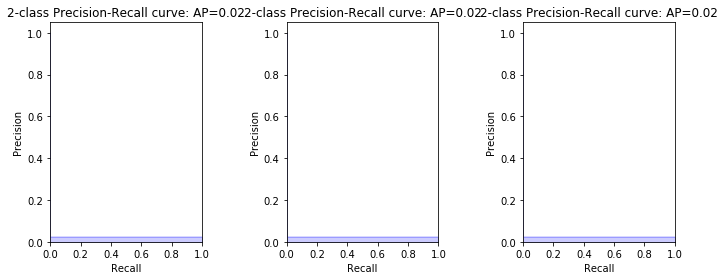

In [15]:

tree_fits(ElemX, ElemY)

## Tune hyperparameters for a RF + Feature Importances

In [41]:
# Down sampling of data
print(Highdf[Highdf.RenewlSchl == 1].shape[0], Highdf[Highdf.RenewlSchl == 0].shape[0])
print(Middf[Middf.RenewlSchl == 1].shape[0], Middf[Middf.RenewlSchl == 0].shape[0])
print(Elemdf[Elemdf.RenewlSchl == 1].shape[0], Elemdf[Elemdf.RenewlSchl == 0].shape[0])


11 367
3 176
7 624


*** Elementary schools ***

In [43]:
#y = elem['ENRNUMAFM_cluster']

X_train,X_test,y_train,y_test=train_test_split(ElemX, ElemY, test_size=0.3, random_state=999,stratify=ElemY)
X_train,X_val,y_train,y_val=train_test_split(X_train, y_train, test_size=0.3, random_state=111, stratify=y_train)

X_train, y_train = class_upp_samp(X_train,y_train)

hypertuner(X_train, y_train, X_val, y_val)

{'max_depth': 1, 'max_leaf_nodes': 4, 'min_samples_leaf': 4}
ROC AUC:  0.965648854962


In [44]:
rf = RandomForestClassifier(n_jobs=-1,min_samples_leaf=4, max_depth=1, max_leaf_nodes=4)
rf.fit(X_train, y_train)
pred=rf.predict_proba(X_test)[:,1]

print ('Random Forest Classifier Results: ')
print ('In sample accuracy:',rf.score(X_train,y_train))

# out of sample accuracy
print ('Out of sample accuracy:',rf.score(X_test,y_test))
print ('ROC Score: ', roc_auc_score(np.array(y_test),pred))

Random Forest Classifier Results: 
In sample accuracy: 0.995081967213
Out of sample accuracy: 0.984210526316
ROC Score:  0.970744680851


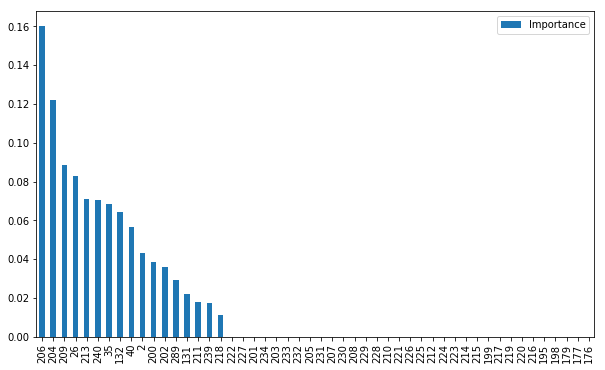

In [45]:
fet_imp = feat_imp(X_train, rf)

In [46]:
fet_imp.sort_values(by=['Importance'], ascending=False).iloc[:5]

,Variable,Importance
206,STCMTHPCTL34G05 mean96_16,0.160178
204,STCMTHPCTL34G03 mean96_16,0.122241
209,ela5_decile mean96_16,0.088774
26,ENRNUMAFM trend96_16,0.082827
213,ATTPCTG04 std96_16,0.070782


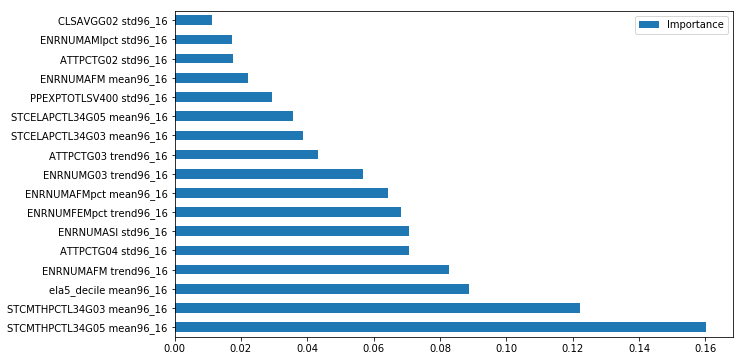

In [47]:
mos_imp_feat(fet_imp, 218)

*** Middle schools ***

In [53]:
#y = elem['ENRNUMAFM_cluster']

X_train,X_test,y_train,y_test=train_test_split(MidX, MidY, test_size=0.3, random_state=999, stratify=MidY)
X_train,X_val,y_train,y_val=train_test_split(X_train, y_train, test_size=0.3, random_state=111, stratify=y_train)

X_train, y_train = class_upp_samp(X_train,y_train)

hypertuner(X_train, y_train, X_val, y_val)

{'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 2}
ROC AUC:  0.351351351351


In [54]:
rf = RandomForestClassifier(n_jobs=-1,min_samples_leaf=2, max_depth=1, max_leaf_nodes=2)
rf.fit(X_train, y_train)
pred=rf.predict_proba(X_test)[:,1]

print ('Random Forest Classifier Results: ')
print ('In sample accuracy:',rf.score(X_train,y_train))

# out of sample accuracy
print ('Out of sample accuracy:',rf.score(X_test,y_test))
print ('ROC Score: ', roc_auc_score(np.array(y_test),pred))

Random Forest Classifier Results: 
In sample accuracy: 1.0
Out of sample accuracy: 0.981481481481
ROC Score:  0.367924528302


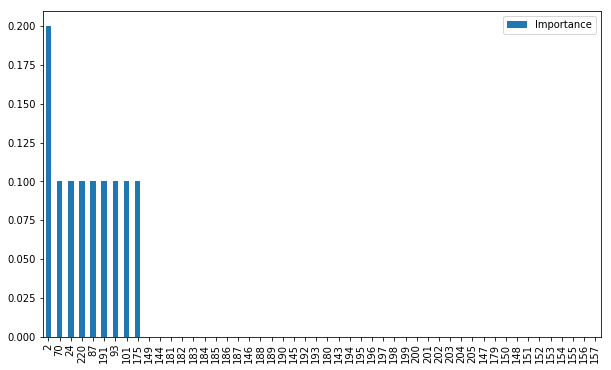

In [55]:
fet_imp = feat_imp(X_train, rf)

In [51]:
fet_imp.sort_values(by=['Importance'], ascending=False).iloc[:5]

,Variable,Importance
218,ENRNUMG07pct std96_16,0.2
275,ela8_decile std96_16,0.1
48,ENRNUMPOVpct trend96_16,0.1
1,ATTPCTG07 trend96_16,0.1
146,MS_growth mean96_16,0.1


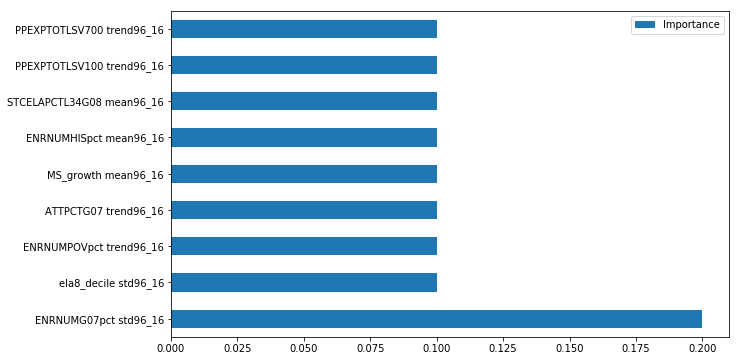

In [52]:
mos_imp_feat(fet_imp, 70)

*** High Schools ***

In [56]:
#y = elem['ENRNUMAFM_cluster']

X_train,X_test,y_train,y_test=train_test_split(HighX, HighY, test_size=0.3, random_state=999, stratify=HighY)
X_train,X_val,y_train,y_val=train_test_split(X_train, y_train, test_size=0.3, random_state=111, stratify=y_train)

X_train, y_train = class_upp_samp(X_train,y_train)

hypertuner(X_train, y_train, X_val, y_val)

{'max_depth': 3, 'max_leaf_nodes': 6, 'min_samples_leaf': 2}
ROC AUC:  0.560897435897


In [57]:
rf = RandomForestClassifier(n_jobs=-1,min_samples_leaf=2, 
                            max_depth=3, max_leaf_nodes=6)
rf.fit(X_train, y_train)
pred=rf.predict_proba(X_test)[:,1]

print ('Random Forest Classifier Results: ')
print ('In sample accuracy:',rf.score(X_train,y_train))

# out of sample accuracy
print ('Out of sample accuracy:',rf.score(X_test,y_test))
print ('ROC Score: ', roc_auc_score(np.array(y_test),pred))

Random Forest Classifier Results: 
In sample accuracy: 1.0
Out of sample accuracy: 0.982456140351
ROC Score:  0.86036036036


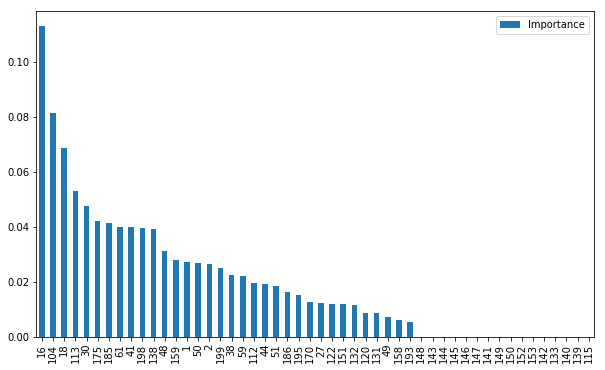

In [58]:
fet_imp = feat_imp(X_train, rf)

In [59]:
fet_imp.sort_values(by=['Importance'], ascending=False).iloc[:5]

,Variable,Importance
16,ENRNUMASI trend96_16,0.113132
104,ENRNUMMALpct mean96_16,0.081380
18,ENRNUMFEM trend96_16,0.068617
113,HSOPCTHSGNYC mean96_16,0.052910
30,ENRNUMHIS trend96_16,0.047708


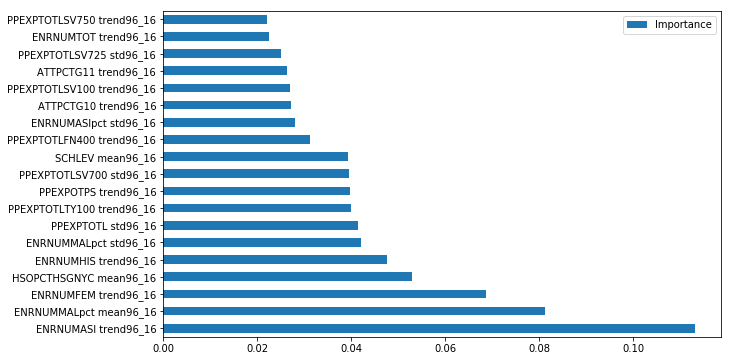

In [60]:
mos_imp_feat(fet_imp, 59)

# Communtiy Schools

In [61]:
# Define Y for renewal
HighY = Highdf.Community_Sch
MidY = Middf.Community_Sch
ElemY = Elemdf.Community_Sch

### Preliminary Analysis

In [62]:
# Define X for each data set
HighX = Highdf.loc[:,'BNLONG':'DBN'].drop(['BNLONG','DBN'], axis=1)
MidX = Middf.loc[:,'BNLONG':'DBN'].drop(['BNLONG','DBN'], axis=1)
ElemX = Elemdf.loc[:,'BNLONG':'DBN'].drop(['BNLONG','DBN'], axis=1)

High
Decision Tree Classifier Results: 
In sample accuracy: 1.0
Out of sample accuracy: 0.69298245614


Average precision-recall score: 0.14


Random Forest Classifier Results: 
In sample accuracy: 0.988636363636
Out of sample accuracy: 0.859649122807


Average precision-recall score: 0.14


Extra Tree Classifier Results: 
In sample accuracy: 1.0
Out of sample accuracy: 0.719298245614


Average precision-recall score: 0.13
Middle
Decision Tree Classifier Results: 
In sample accuracy: 1.0
Out of sample accuracy: 0.592592592593


Average precision-recall score: 0.23


Random Forest Classifier Results: 
In sample accuracy: 0.968
Out of sample accuracy: 0.759259259259


Average precision-recall score: 0.21


Extra Tree Classifier Results: 
In sample accuracy: 1.0
Out of sample accuracy: 0.685185185185


Average precision-recall score: 0.23
Elem
Decision Tree Classifier Results: 
In sample accuracy: 1.0
Out of sample accuracy: 0.778947368421


Average precision-recall score: 0.13


Random F

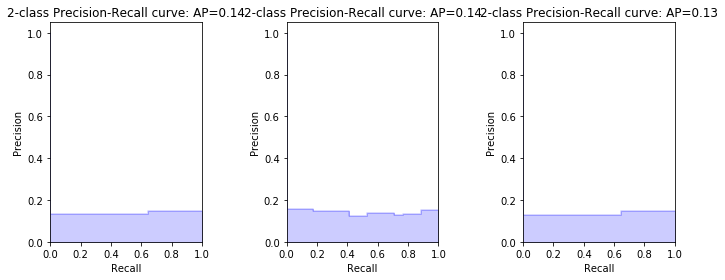

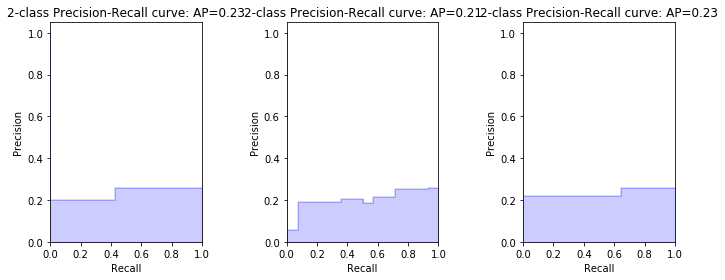

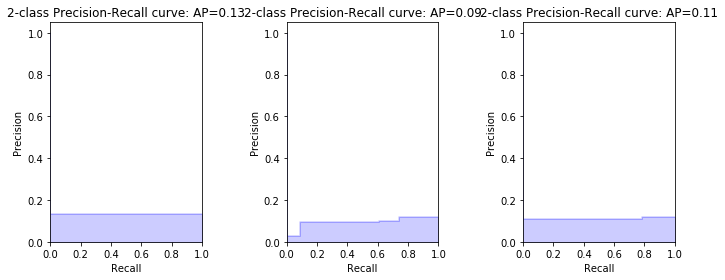

In [63]:
print("High")

tree_fits(HighX, HighY)
print("Middle")

tree_fits(MidX, MidY)
print("Elem")

tree_fits(ElemX, ElemY)

### Understand Data Mixes
(True, False)

In [64]:
# Down sampling of data
print(True, False)
print(Highdf[Highdf.Community_Sch == 1].shape[0], Highdf[Highdf.Community_Sch == 0].shape[0])
print(Middf[Middf.Community_Sch == 1].shape[0], Middf[Middf.Community_Sch == 0].shape[0])
print(Elemdf[Elemdf.Community_Sch == 1].shape[0], Elemdf[Elemdf.Community_Sch == 0].shape[0])

True False
63 315
48 131
73 558


*** Elementary schools ***

In [65]:
#y = elem['ENRNUMAFM_cluster']

X_train,X_test,y_train,y_test=train_test_split(ElemX, ElemY, test_size=0.3, random_state=999, stratify=ElemY)
X_train,X_val,y_train,y_val=train_test_split(X_train, y_train, test_size=0.3, random_state=111, stratify=y_train)

X_train, y_train = class_upp_samp(X_train,y_train)

hypertuner(X_train, y_train, X_val, y_val)

{'max_depth': 13, 'max_leaf_nodes': 18, 'min_samples_leaf': 2}
ROC AUC:  0.497740112994


In [66]:
rf = RandomForestClassifier(n_jobs=-1,min_samples_leaf=2, 
                            max_depth=13, max_leaf_nodes=18)
rf.fit(X_train, y_train)
pred=rf.predict_proba(X_test)[:,1]

print ('Random Forest Classifier Results: ')
print ('In sample accuracy:',rf.score(X_train,y_train))

# out of sample accuracy
print ('Out of sample accuracy:',rf.score(X_test,y_test))
print ('ROC Score: ', roc_auc_score(np.array(y_test),pred))

Random Forest Classifier Results: 
In sample accuracy: 0.994485294118
Out of sample accuracy: 0.863157894737
ROC Score:  0.777191558442


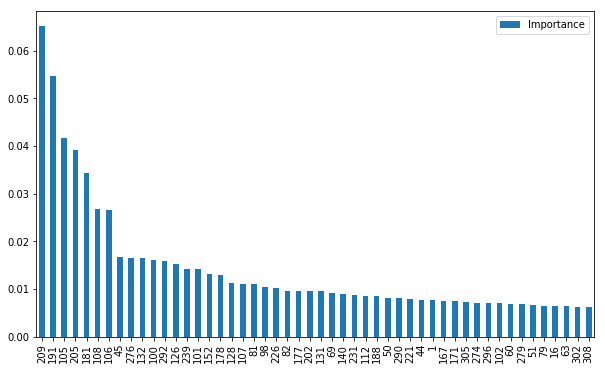

In [67]:
fet_imp = feat_imp(X_train, rf)

In [68]:
fet_imp.sort_values(by=['Importance'], ascending=False).iloc[:5]

,Variable,Importance
209,ela5_decile mean96_16,0.065205
191,PPEXPTOTLSV750 mean96_16,0.054745
105,ATTPCTG01 mean96_16,0.041736
205,STCMTHPCTL34G04 mean96_16,0.039227
181,PPEXPTOTLGR452 mean96_16,0.034402


In [ ]:
mos_imp_feat(fet_imp, 281)

*** Middle schools ***

In [69]:
#y = elem['ENRNUMAFM_cluster']

X_train,X_test,y_train,y_test=train_test_split(MidX, MidY, test_size=0.3, random_state=999, stratify=MidY)
X_train,X_val,y_train,y_val=train_test_split(X_train, y_train, test_size=0.3, random_state=111, stratify=y_train)

X_train, y_train = class_upp_samp(X_train,y_train)

hypertuner(X_train, y_train, X_val, y_val)

{'max_depth': 9, 'max_leaf_nodes': 12, 'min_samples_leaf': 2}
ROC AUC:  0.853571428571


In [70]:
rf = RandomForestClassifier(n_jobs=-1,min_samples_leaf=2, 
                            max_depth=9, max_leaf_nodes=12)
rf.fit(X_train, y_train)
pred=rf.predict_proba(X_test)[:,1]

print ('Random Forest Classifier Results: ')
print ('In sample accuracy:',rf.score(X_train,y_train))

# out of sample accuracy
print ('Out of sample accuracy:',rf.score(X_test,y_test))
print ('ROC Score: ', roc_auc_score(np.array(y_test),pred))

Random Forest Classifier Results: 
In sample accuracy: 1.0
Out of sample accuracy: 0.648148148148
ROC Score:  0.591964285714


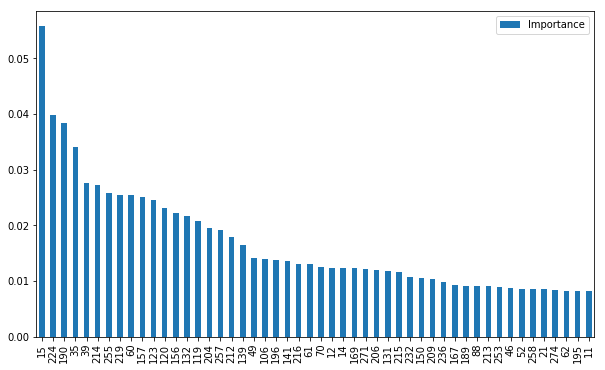

In [71]:
fet_imp = feat_imp(X_train, rf)

In [72]:
fet_imp.sort_values(by=['Importance'], ascending=False).iloc[:5]

,Variable,Importance
15,CLSNUMGEN trend96_16,0.055825
224,ENRNUMHISpct std96_16,0.039902
190,CCDNUMFTE std96_16,0.038360
35,ENRNUMG08 trend96_16,0.034023
39,ENRNUMHIS trend96_16,0.027618


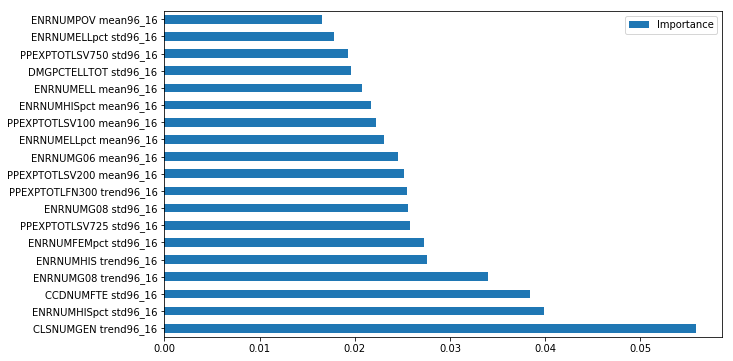

In [74]:
mos_imp_feat(fet_imp, 139)

*** High Schools ***

In [73]:
#y = elem['ENRNUMAFM_cluster']

X_train,X_test,y_train,y_test=train_test_split(HighX, HighY, test_size=0.3, random_state=999, stratify=HighY)
X_train,X_val,y_train,y_val=train_test_split(X_train, y_train, test_size=0.3, random_state=111, stratify=y_train)

X_train, y_train = class_upp_samp(X_train,y_train)

hypertuner(X_train, y_train, X_val, y_val)

{'max_depth': 17, 'max_leaf_nodes': 16, 'min_samples_leaf': 2}
ROC AUC:  0.746268656716


In [75]:
rf = RandomForestClassifier(n_jobs=-1,min_samples_leaf=2, 
                            max_depth=17, max_leaf_nodes=16)
rf.fit(X_train, y_train)
pred=rf.predict_proba(X_test)[:,1]

print ('Random Forest Classifier Results: ')
print ('In sample accuracy:',rf.score(X_train,y_train))

# out of sample accuracy
print ('Out of sample accuracy:',rf.score(X_test,y_test))
print ('ROC Score: ', roc_auc_score(np.array(y_test),pred))

Random Forest Classifier Results: 
In sample accuracy: 0.996732026144
Out of sample accuracy: 0.789473684211
ROC Score:  0.609141274238


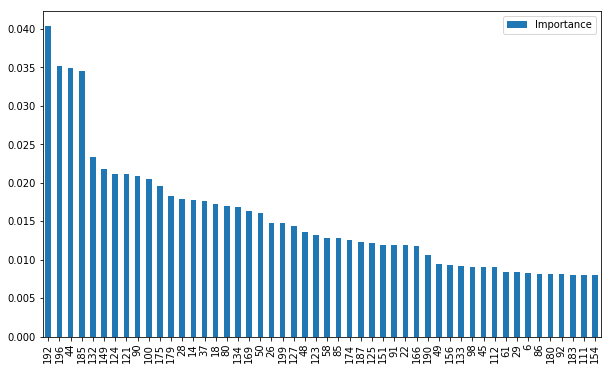

In [76]:
fet_imp = feat_imp(X_train, rf)

In [77]:
fet_imp.sort_values(by=['Importance'], ascending=False).iloc[:5]

,Variable,Importance
192,PPEXPTOTLSV100 std96_16,0.040389
196,PPEXPTOTLSV600 std96_16,0.035131
44,PPEXPTOTLFN100 trend96_16,0.034966
185,PPEXPTOTL std96_16,0.034496
132,PPEXPTOTLSV735 mean96_16,0.023337


In [ ]:
mos_imp_feat(fet_imp, 43)

# Closed Schools

In [78]:
# Define Y for renewal
HighY = Highdf.Closed
MidY = Middf.Closed
ElemY = Elemdf.Closed

### Preliminary Analysis

In [79]:
# Define X for each data set
HighX = Highdf.loc[:,'BNLONG':'DBN'].drop(['BNLONG','DBN'], axis=1)
MidX = Middf.loc[:,'BNLONG':'DBN'].drop(['BNLONG','DBN'], axis=1)
ElemX = Elemdf.loc[:,'BNLONG':'DBN'].drop(['BNLONG','DBN'], axis=1)

Decision Tree Classifier Results: 
In sample accuracy: 1.0
Out of sample accuracy: 0.964912280702


Average precision-recall score: 0.09


Random Forest Classifier Results: 
In sample accuracy: 0.996212121212
Out of sample accuracy: 0.982456140351


Average precision-recall score: 0.07


Extra Tree Classifier Results: 
In sample accuracy: 1.0
Out of sample accuracy: 0.929824561404


Average precision-recall score: 0.08


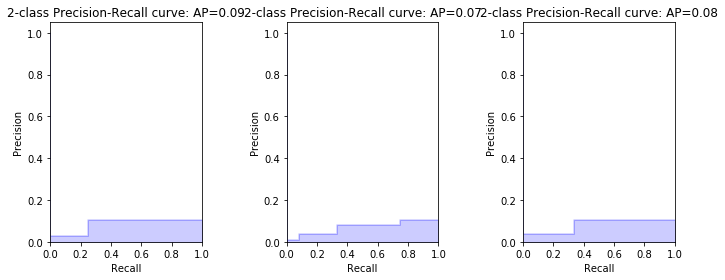

In [80]:
#HighX, HighY = class_upp_samp(HighX, HighY)
tree_fits(HighX, HighY)

### Understand Data Mixes
(True, False)

In [81]:
# Down sampling of data
print(True, False)
print(Highdf[Highdf.Closed == 1].shape[0], Highdf[Highdf.Closed == 0].shape[0])
print(Middf[Middf.Closed == 1].shape[0], Middf[Middf.Closed == 0].shape[0])
print(Elemdf[Elemdf.Closed == 1].shape[0], Elemdf[Elemdf.Closed == 0].shape[0])

True False
51 327
0 179
0 631


No point running Elem and Mid - No CLosed Schools

*** High Schools ***

In [82]:
#y = elem['ENRNUMAFM_cluster']

X_train,X_test,y_train,y_test=train_test_split(HighX, HighY, 
                                               test_size=0.3, 
                                               random_state=999, 
                                              stratify=HighY)
X_train,X_val,y_train,y_val=train_test_split(X_train, y_train, 
                                             test_size=0.3, 
                                             random_state=111,
                                            stratify=y_train)

X_train, y_train = class_upp_samp(X_train,y_train)

hypertuner(X_train, y_train, X_val, y_val)

{'max_depth': 13, 'max_leaf_nodes': 10, 'min_samples_leaf': 2}
ROC AUC:  0.986824769433


In [83]:
rf = RandomForestClassifier(n_jobs=-1,min_samples_leaf=2, 
                            max_depth=13, max_leaf_nodes=10)
rf.fit(X_train, y_train)
pred=rf.predict_proba(X_test)[:,1]

print ('Random Forest Classifier Results: ')
print ('In sample accuracy:',rf.score(X_train,y_train))

# out of sample accuracy
print ('Out of sample accuracy:',rf.score(X_test,y_test))
print ('ROC Score: ', roc_auc_score(np.array(y_test),pred))

Random Forest Classifier Results: 
In sample accuracy: 1.0
Out of sample accuracy: 0.991228070175
ROC Score:  0.998653198653


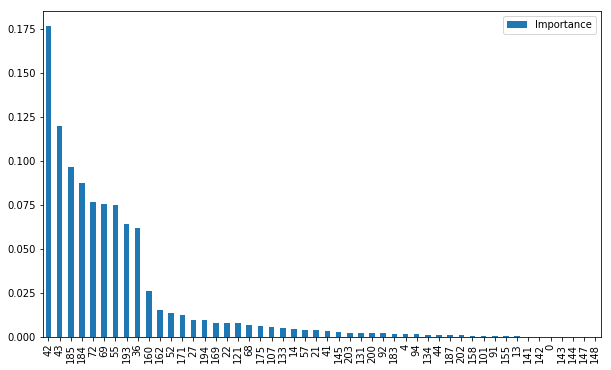

In [84]:
fet_imp = feat_imp(X_train, rf)

In [85]:
fet_imp.sort_values(by=['Importance'], ascending=False).iloc[:5]

,Variable,Importance
42,PPEXPPERS trend96_16,0.176657
43,PPEXPTOTL trend96_16,0.119826
185,PPEXPTOTL std96_16,0.096361
184,PPEXPPERS std96_16,0.087485
72,ATTPCTTOT mean96_16,0.076560


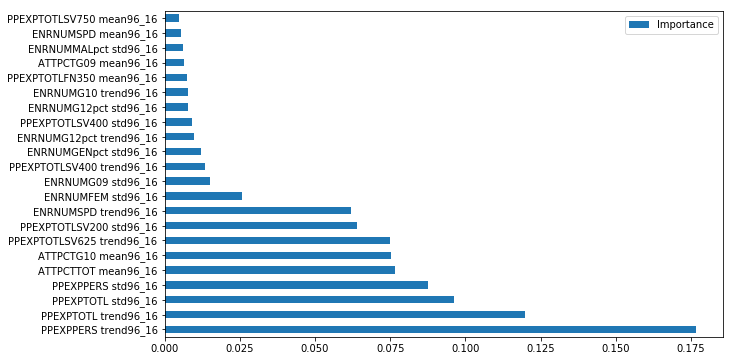

In [86]:
mos_imp_feat(fet_imp, 133)